## The curse of Dimensionality

Humans are bound by their perception of a maximum of three dimensions. We can’t comprehend shapes/graphs beyond three dimensions. Often, data scientists get datasets which have thousands of features. They give birth to two kinds of problems:

* **Increase in computation time:** Majority of the machine learning algorithms they rely on the calculation of distance for model building and as the number of dimensions increases it becomes more and more computation-intensive to create a model out of it. For example, if we have to calculate the distance between two points in just one dimension, like two points on the number line, we’ll just subtract the coordinate of one point from another and then take the magnitude:

Distance= $ x_1-x_2 $

What if we need to calculate the distance between two points in two dimensions?

The same formula translates to:
Distance= $ \sqrt {(x_1-x_2)^2+(y_1-y_2)^2} $

What if we need to calculate the distance between two points in three dimensions?

The same formula translates to:
Distance= $ \sqrt {(x_1-x_2)^2+(y_1-y_2)^2+(z_1-z_2)^2}$

And for N-dimensions, the formula becomes:
Distance=$ \sqrt {(a_1-a_2)^2+(b_1-b_2)^2+(c_1-c_2)^2+…+(n_1-n_2)^2} $

This is the effort of calculating the distance between two points. Just imagine the number of calculations involved for all the data points involved.

One more point to consider is that as the number of dimension increases, points are going far away from each other. This means that any new point that comes when we are testing the model is going to be farther away from our training points. This leads to a less reliable model, and it makes our model overfitted to the training data.



* **Hard (or almost impossible) to visualise the relationship between features:** As stated above, humans can not comprehend things beyond three dimensions. So, if we have an n-dimensional dataset, the only solution left to us is to create either a 2-D or 3-D graph out of it. Let’s say for simplicity, we are creating 2-D graphs. Suppose we have 1000 features in the dataset. That results in a  total (1000*999)/2= 499500 combinations possible for creating the 2-D graph.

Is it humanly possible to analyse all those graphs to understand the relationship between the variables?

**The questions that we need to ask at this point are:**

* Are all the features really contributing to decision making?
* Is there a way to come to the same conclusion using a lesser number of features?
* Is there a way to combine features to create a new feature and drop the old ones?
* Is there a way to remodel features in a way to make them visually comprehensible?

The answer to all the above questions is- _Dimensionality Reduction technique._




## Principal Component Analysis:
The principal component analysis is an unsupervised machine learning algorithm used for feature selection using dimensionality reduction techniques. As the name suggests, it finds out the principal components from the data. PCA transforms and fits the data from a higher-dimensional space to a new, lower-dimensional subspace This results into an entirely new coordinate system of the points where the first axis corresponds to the first principal component that explains the most variance in the data.

**What are the principal components?**
Principal components are the derived features which explain the maximum variance in the data. The first principal component explains the most variance, the 2nd a bit less and so on. Each of the new dimensions found using PCA is a linear combination of the old features.

Let's take the following example where the data is distributed like the diagram on the left:
<img src="PCA_intro1.PNG" width="500">



**what is the optimum number of Principal components needed?**



#### Explained Variance Ratio

All of the above questions are answered using the *explained variance ratio*. It represents the amount of variance each principal component is able to explain.

For example, suppose if the square of distances of all the points from the origin that lie on PC1 is 50 and for the points on PC2 it’s 5.

EVR of PC1=$\frac{Distance of PC1 points}{( Distance of PC1 points+ Distance of PC2 points)}=\frac{50}{55}=0.91 $

EVR of PC2=$\frac{Distance of PC2 points}{( Distance of PC1 points+ Distance of PC2 points)}=\frac{5}{55}=0.09 $


Thus PC1 explains 91% of the variance of data. Whereas, PC2 only explains 9% of the variance. Hence we can use only PC1 as the input for our model as it explains the majority of the variance.

In a real-life scenario, this problem is solved using the **Scree Plots**

## Scree Plots:
Scree plots are the graphs that convey how much variance is explained by corresponding Principal components.
<img src="scree.PNG" width="500">

As shown in the given diagram, around 75 principal components explain approximately 90 % of the variance. Hence, 75 can be a good choice based on the scenario

## Python Implementation

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [20]:
# we are using the free glass datset.
# The objective is to tell the type of glass based on amount of other elements present.
data = pd.read_csv('glass.data')

In [21]:
data

,index,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Class
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
209,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


  Basic checks

In [9]:
data.shape

(214, 11)

In [27]:
data.drop('index',axis=1,inplace=True)

In [28]:
data.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Class
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [13]:
data.tail()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Class
209,1.51623,14.14,0.0,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.0,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.0,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.0,1.94,73.61,0.00,8.48,1.57,0.0,7
213,1.51711,14.23,0.0,2.08,73.36,0.00,8.62,1.67,0.0,7


In [14]:
data.Class.unique() # 6 class classification

array([1, 2, 3, 5, 6, 7], dtype=int64)

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Class   214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [16]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
RI,214.0,1.518365,0.003037,1.51115,1.516522,1.51768,1.519157,1.53393
Na,214.0,13.407850,0.816604,10.73000,12.907500,13.30000,13.825000,17.38000
Mg,214.0,2.684533,1.442408,0.00000,2.115000,3.48000,3.600000,4.49000
Al,214.0,1.444907,0.499270,0.29000,1.190000,1.36000,1.630000,3.50000
Si,214.0,72.650935,0.774546,69.81000,72.280000,72.79000,73.087500,75.41000
K,214.0,0.497056,0.652192,0.00000,0.122500,0.55500,0.610000,6.21000
Ca,214.0,8.956963,1.423153,5.43000,8.240000,8.60000,9.172500,16.19000
Ba,214.0,0.175047,0.497219,0.00000,0.000000,0.00000,0.000000,3.15000
Fe,214.0,0.057009,0.097439,0.00000,0.000000,0.00000,0.100000,0.51000
Class,214.0,2.780374,2.103739,1.00000,1.000000,2.00000,3.000000,7.00000


### Exploratory Data Analysis

### Data Preprocessing

In [17]:
## CHecking missing values
data.isnull().sum()

RI       0
Na       0
Mg       0
Al       0
Si       0
K        0
Ca       0
Ba       0
Fe       0
Class    0
dtype: int64

In [22]:
data.duplicated().sum()

0

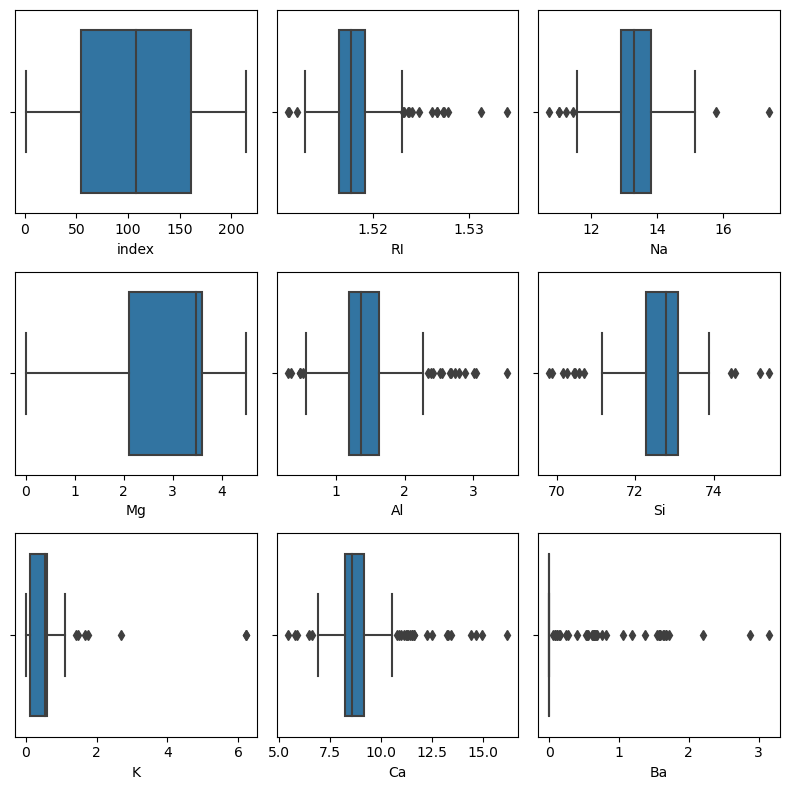

In [23]:
#outlier handling
import seaborn as sns
plt.figure(figsize=(8,8))
plot = 1
for i in data.drop('Class',axis=1):
  if plot <= 9:
    ax = plt.subplot(3,3,plot)
    sns.boxplot(x = data[i])
  plot+=1
plt.tight_layout()


In [ ]:
#outliers can be handled at this point

In [ ]:
#Encoding - skipped - data has no categorical column

In [24]:
#scaling -- is applied on continous data i.e entire x is a continous data 
# hence scaling is applied on x

In [15]:
data.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Class
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [30]:
## creating X and y
x = data.drop(labels=['Class'], axis=1)
y = data['Class']


In [32]:
from sklearn.preprocessing import StandardScaler #import
scaler = StandardScaler()  #init
scaled_data = scaler.fit_transform(x) # push entire x for scaling
scaled_data
# scaled data what we are getting is in the form of an array
# we need conver it back to dataframe

array([[ 0.87286765,  0.28495326,  1.25463857, ..., -0.14576634,
        -0.35287683, -0.5864509 ],
       [-0.24933347,  0.59181718,  0.63616803, ..., -0.79373376,
        -0.35287683, -0.5864509 ],
       [-0.72131806,  0.14993314,  0.60142249, ..., -0.82894938,
        -0.35287683, -0.5864509 ],
       ...,
       [ 0.75404635,  1.16872135, -1.86551055, ..., -0.36410319,
         2.95320036, -0.5864509 ],
       [-0.61239854,  1.19327046, -1.86551055, ..., -0.33593069,
         2.81208731, -0.5864509 ],
       [-0.41436305,  1.00915211, -1.86551055, ..., -0.23732695,
         3.01367739, -0.5864509 ]])

In [19]:
x.columns

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe'], dtype='object')

In [33]:
## creating new dataframe
df = pd.DataFrame(data=scaled_data, columns= x.columns)

In [34]:
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,0.872868,0.284953,1.254639,-0.692442,-1.127082,-0.671705,-0.145766,-0.352877,-0.586451
1,-0.249333,0.591817,0.636168,-0.170460,0.102319,-0.026213,-0.793734,-0.352877,-0.586451
2,-0.721318,0.149933,0.601422,0.190912,0.438787,-0.164533,-0.828949,-0.352877,-0.586451
3,-0.232831,-0.242853,0.698710,-0.310994,-0.052974,0.112107,-0.519052,-0.352877,-0.586451
4,-0.312045,-0.169205,0.650066,-0.411375,0.555256,0.081369,-0.624699,-0.352877,-0.586451


PC's

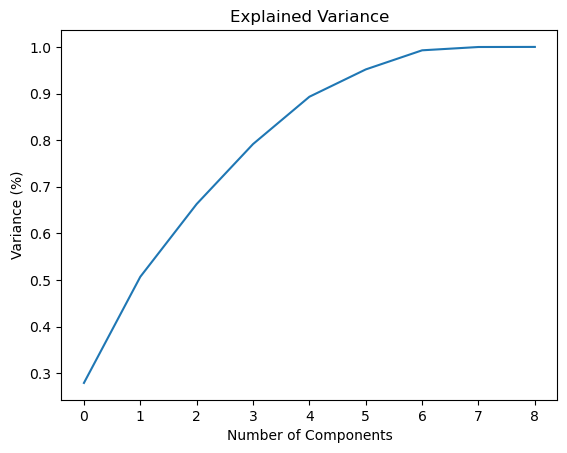

In [35]:
## getting the optimal number of pca

from sklearn.decomposition import PCA #import

pca = PCA() #inita

principalComponents = pca.fit_transform(df)  #getting the PC's

plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))

plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Explained Variance')
plt.show()

From the diagram above, it can be seen that 4 principal components explain almost 90% of the variance in data and 5 principal components explain around 95% of the variance in data.

So, instead of giving all the columns as input, we’d only feed these either 4 or 5 principal components of the data to the machine learning algorithm and we’d obtain a similar result.

In [36]:
pca = PCA(n_components=5) #initialse

new_data = pca.fit_transform(df)

# This will be the new data fed to the algorithm.

principal_Df = pd.DataFrame(data = new_data
             , columns = ['principal component 1', 'principal component 2','principal component 3',
                          'principal component 4','principal component 5'])

In [37]:
principal_Df

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5
0,1.151140,-0.529488,-0.372096,1.728901,-0.251936
1,-0.574137,-0.759788,-0.556708,0.760232,-0.257071
2,-0.940160,-0.929836,-0.554907,0.206254,-0.237506
3,-0.142083,-0.961677,-0.117125,0.415724,-0.476299
4,-0.351092,-1.091249,-0.485079,0.069102,-0.432090
...,...,...,...,...,...
209,-2.383835,3.061677,0.090445,-0.376611,0.103227
210,-2.397652,3.108236,-1.117502,0.288454,0.624723
211,-1.680246,3.284823,-0.930349,-0.171014,0.451687
212,-2.369748,2.756873,-1.234701,-0.525285,0.515008


Here, we see that earlier we had 9 columns in the data earlier. Now with the help of Scree plot and PCA, we have reduced the number of features to be used for model building to 5
. This is the advantage of PCA. _It drastically reduces the number of features, thereby considerably reducing the training time for the model._

In [ ]:
## task: create 2 models where in first model with all fetaures and second model with 4 pca features and check the performance

**Pros of PCA:**

- Correlated features are removed.
- Model training time is reduced.
- Overfitting is reduced.
- Helps in better visualizations
- Ability to handle noise

**Cons of PCA**
- The resultant principal components are less interpretable than the original data
- Can lead to information loss if the explained variance threshold is not considered appropriately.



### Conclusion
From all the explanations above, we can conclude that PCA is a very powerful technique for reducing the dimensions of the data, projecting the data from a higher dimension to a lower dimension, helps in data visualization, helps in data compression and most of all increases the model training speed drastically by decreasing the number of variables involved in computation.

https://i.stack.imgur.com/Q7HIP.gif